In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# Path ke dataset
dataset_path = r"C:\Users\Bima Indra\Documents\Journal PI Acne Detection\dataset\train"
test_path = r"C:\Users\Bima Indra\Documents\Journal PI Acne Detection\dataset\test"

In [3]:
# Parameter
image_size = (128, 128)
batch_size = 32
epochs = 100

In [4]:
# Augmentasi untuk training dan validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 582 images belonging to 3 classes.
Found 144 images belonging to 3 classes.


In [5]:
# Data uji (tanpa augmentasi)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 28 images belonging to 3 classes.


In [6]:
# Bangun model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
# Callback
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('model_jerawat.h5', save_best_only=True)

In [8]:
# Training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/100
19/19 [==============================] - 17s 845ms/step - loss: 1.0701 - accuracy: 0.4759 - val_loss: 1.0309 - val_accuracy: 0.5000
Epoch 2/100
19/19 [==============================] - 10s 545ms/step - loss: 1.0404 - accuracy: 0.4948 - val_loss: 1.0298 - val_accuracy: 0.5000
Epoch 3/100
19/19 [==============================] - 11s 554ms/step - loss: 1.0403 - accuracy: 0.4948 - val_loss: 1.0249 - val_accuracy: 0.5000
Epoch 4/100
19/19 [==============================] - 10s 535ms/step - loss: 1.0403 - accuracy: 0.4948 - val_loss: 1.0153 - val_accuracy: 0.5000
Epoch 5/100
19/19 [==============================] - 10s 566ms/step - loss: 1.0358 - accuracy: 0.4948 - val_loss: 1.0224 - val_accuracy: 0.5000
Epoch 6/100
19/19 [==============================] - 10s 556ms/step - loss: 1.0366 - accuracy: 0.4948 - val_loss: 1.0104 - val_accuracy: 0.5000
Epoch 7/100
19/19 [==============================] - 10s 541ms/step - loss: 1.0293 - accuracy: 0.4863 - val_loss: 0.9997 - val_accuracy:

In [9]:
# Plot akurasi & loss
plt.figure(figsize=(12, 12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

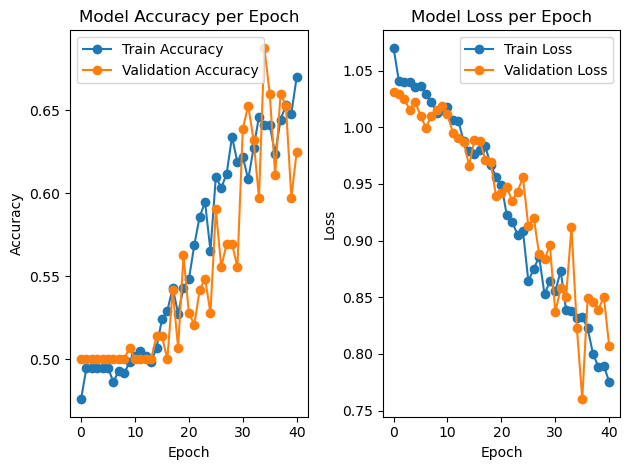

<Figure size 640x480 with 0 Axes>

In [10]:
# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

In [11]:
# Evaluasi pada data uji
loss, accuracy = model.evaluate(test_generator)
print(f"\nEvaluasi pada data uji: Akurasi = {accuracy:.4f}, Loss = {loss:.4f}")

21/21 [==============================] - 0s 10ms/step - loss: 0.6305 - accuracy: 0.6667

Evaluasi pada data uji: Akurasi = 0.6667, Loss = 0.6305


In [12]:
model.save("model_jerawat.h5")